# The Cinematic Nexus: Unveiling the Future of Movie Recommendations and Analysis

by Anthony Amadasun

## 1.1 Data Cleaning and EDA 

---

### 1.1.1 Introduction




In this section, the project will detail the process of acquiring and preparing the data for our movie recommendation system. This includes data gathering, cleaning, and conducting exploratory data analysis.

---

#### Imports

In [1]:
#pip install tmdbsimple

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


import requests
import time

import getpass
import tmdbsimple as tmdb

#for transaction log
import datetime
import json

### 1.1.2 Data Collection

This project use the TMDB API to collect comprehensive movie data, ensuring a diverse and representative dataset for our recommendation system.

**Deliverables:**
- Retrieve movie data from TMDB API, ensuring comprehensive coverage of movie details.
- Validate the integrity of the dataset to avoid missing or incomplete information.
- Handle any API rate limitations, ensuring a smooth and ethical interaction with the TMDB API.

---

In [3]:
# This function uses the tmdbsimple library to interact with TMDB API
def collect_movie_data(api_key, num_movies=1000):
    tmdb.API_KEY = api_key

    # Loop to collect data until reaching the desired number of movies
    movies_data = []
    page = 1
    cumulative_movies_retrieved = 0

    while len(movies_data) < num_movies:
        try:
            response = tmdb.Discover().movie(sort_by='popularity.desc', page=page)
            if not response['results']:
                break
            page += 1
            movies_data.extend(response['results'])
            cumulative_movies_retrieved += len(response['results'])
            time.sleep(0.5)  # handles rate limitation
        except Exception as e:
            print(f"Error: {e}")
            break

        # Log transaction details
        transaction_log = {
            'execution_datetime': str(datetime.datetime.now()),
            'movies_retrieved': len(movies_data),
            'total_movies_retrieved_to_date': cumulative_movies_retrieved + len(movies_data)
        }

        # Writing to a JSON file
        with open('../data/transaction_log_movies.json', 'a') as log_file:
            log_file.write(json.dumps(transaction_log) + '\n')

    # real-time updates
#     with open('../data/transaction_log_movies.json', 'r') as log_file:
#         logs = log_file.readlines()

#         for log in logs:
#             print(log)

    return movies_data


In [4]:
api_key = getpass.getpass(prompt="Enter your TMDB API key:")

Enter your TMDB API key: ········


In [5]:
movie_data = collect_movie_data(api_key, num_movies=3000)

{"execution_datetime": "2024-02-06 15:38:06.863986", "movies_retrieved": 20, "total_movies_retrieved_to_date": 40}

{"execution_datetime": "2024-02-06 17:23:35.659855", "movies_retrieved": 20, "total_movies_retrieved_to_date": 40}

{"execution_datetime": "2024-02-06 17:25:36.408766", "movies_retrieved": 20, "total_movies_retrieved_to_date": 40}

{"execution_datetime": "2024-02-06 17:27:09.332285", "movies_retrieved": 20, "total_movies_retrieved_to_date": 40}

{"execution_datetime": "2024-02-06 17:27:10.024126", "movies_retrieved": 40, "total_movies_retrieved_to_date": 80}

{"execution_datetime": "2024-02-06 17:27:10.797372", "movies_retrieved": 60, "total_movies_retrieved_to_date": 120}

{"execution_datetime": "2024-02-06 17:27:11.487476", "movies_retrieved": 80, "total_movies_retrieved_to_date": 160}

{"execution_datetime": "2024-02-06 17:27:12.175647", "movies_retrieved": 100, "total_movies_retrieved_to_date": 200}

{"execution_datetime": "2024-02-06 17:27:12.857289", "movies_retriev

In [6]:
#create dataframe for the movie data
tmdb_df = pd.DataFrame(movie_data)

In [7]:
#check first 5 rows
tmdb_df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/4MCKNAc6AbWjEsM2h9Xc29owo4z.jpg,"[28, 53, 18]",866398,en,The Beekeeper,One man’s campaign for vengeance takes on nati...,4578.602,/A7EByudX0eOzlkQ2FIbogzyazm2.jpg,2024-01-10,The Beekeeper,False,7.422,733
1,False,/yyFc8Iclt2jxPmLztbP617xXllT.jpg,"[35, 10751, 14]",787699,en,Wonka,Willy Wonka – chock-full of ideas and determin...,1665.323,/qhb1qOilapbapxWQn9jtRCMwXJF.jpg,2023-12-06,Wonka,False,7.239,1886
2,False,/pWsD91G2R1Da3AKM3ymr3UoIfRb.jpg,"[28, 878, 18]",933131,ko,황야,After a deadly earthquake turns Seoul into a l...,1602.083,/zVMyvNowgbsBAL6O6esWfRpAcOb.jpg,2024-01-26,Badland Hunters,False,7.049,205
3,False,/cnqwv5Uz3UW5f086IWbQKr3ksJr.jpg,"[28, 12, 14]",572802,en,Aquaman and the Lost Kingdom,Black Manta seeks revenge on Aquaman for his f...,1373.572,/7lTnXOy0iNtBAdRP3TZvaKJ77F6.jpg,2023-12-20,Aquaman and the Lost Kingdom,False,6.985,1441
4,False,/feSiISwgEpVzR1v3zv2n2AU4ANJ.jpg,"[878, 12, 28]",609681,en,The Marvels,"Carol Danvers, aka Captain Marvel, has reclaim...",1220.928,/9GBhzXMFjgcZ3FdR9w3bUMMTps5.jpg,2023-11-08,The Marvels,False,6.357,1418


In [8]:
#display basic information
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              3000 non-null   bool   
 1   backdrop_path      2966 non-null   object 
 2   genre_ids          3000 non-null   object 
 3   id                 3000 non-null   int64  
 4   original_language  3000 non-null   object 
 5   original_title     3000 non-null   object 
 6   overview           3000 non-null   object 
 7   popularity         3000 non-null   float64
 8   poster_path        3000 non-null   object 
 9   release_date       3000 non-null   object 
 10  title              3000 non-null   object 
 11  video              3000 non-null   bool   
 12  vote_average       3000 non-null   float64
 13  vote_count         3000 non-null   int64  
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 287.2+ KB


In [9]:
#check shape
tmdb_df.shape

(3000, 14)

In [10]:
#check the data type
tmdb_df.dtypes

adult                   bool
backdrop_path         object
genre_ids             object
id                     int64
original_language     object
original_title        object
overview              object
popularity           float64
poster_path           object
release_date          object
title                 object
video                   bool
vote_average         float64
vote_count             int64
dtype: object

In [11]:
#Check for missing values in each columns
tmdb_df.isnull().sum()

adult                 0
backdrop_path        34
genre_ids             0
id                    0
original_language     0
original_title        0
overview              0
popularity            0
poster_path           0
release_date          0
title                 0
video                 0
vote_average          0
vote_count            0
dtype: int64

In [12]:
#check for duplicates
print(f'number of duplicates in overview: {tmdb_df["overview"].duplicated().sum()}')
print(f'number of duplicates in title: {tmdb_df["title"].duplicated().sum()}')

number of duplicates in overview: 43
number of duplicates in title: 89


### 1.1.3 Data Cleaning and EDA

**Data Cleaning Deliverables:**

- Address missing or inconsistent data entries by applying appropriate imputation techniques.
- Standardize and clean data formats, ensuring consistency across different data fields.
- Handle outliers and anomalies that might impact the accuracy of recommendations.
- Normalize numerical features for better model performance.

**EDA Deliverables:**

- Conduct a thorough exploration of the dataset to gain insights into movie trends and characteristics.
- Analyze distributions of key variables such as genre, release year, and user ratings.
- Visualize the relationships between different features to identify potential patterns or correlations.
- Extract meaningful statistics to inform the modeling process.

---

In [13]:
#descriptive statistic
tmdb_df.describe()

,id,popularity,vote_average,vote_count
count,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,3.826476e+05,61.830129,6.616945,3587.570000
std,3.763770e+05,115.835817,1.268578,4717.285474
min,1.100000e+01,18.089000,0.000000,0.000000
25%,1.206150e+04,33.660750,6.190000,255.500000
50%,2.995350e+05,41.695000,6.772500,1849.000000
75%,6.836670e+05,58.493250,7.344000,5109.750000
max,1.235525e+06,4578.602000,10.000000,35205.000000


In [14]:
#convert release_date to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], errors='coerce')

Text(0.5, 1.0, 'Box Plot for Vote Average')

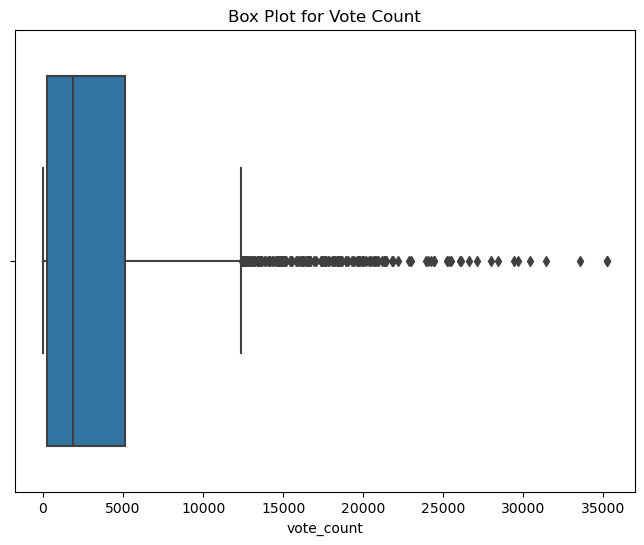

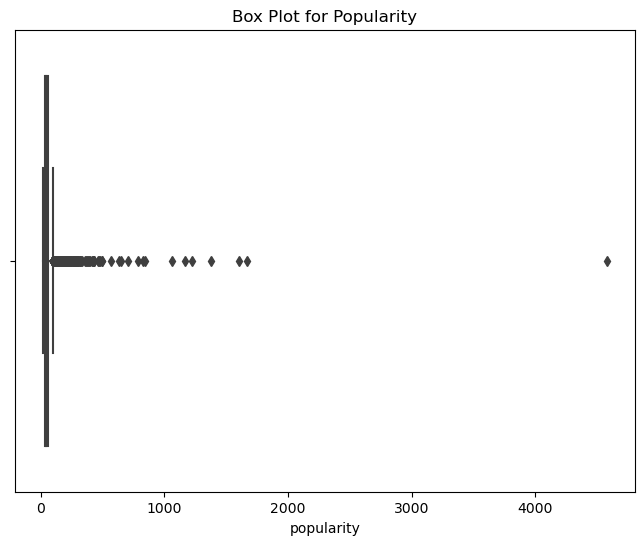

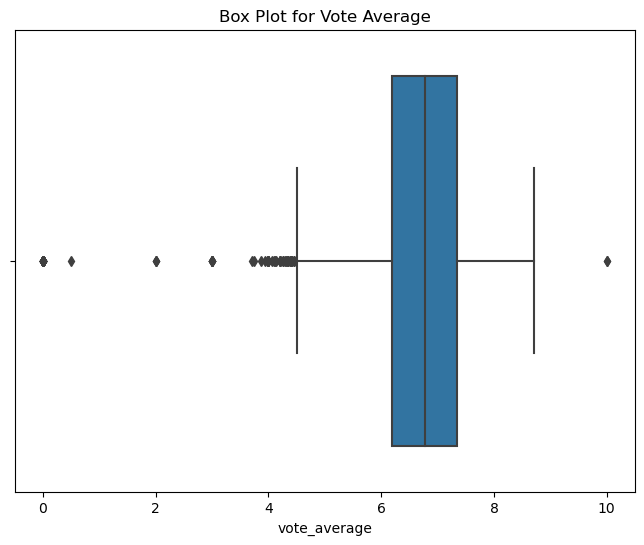

In [27]:
#box plot to check for outliers

# Box plot for vote_count
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['vote_count'])
plt.title('Box Plot for Vote Count')


# Box plot for popularity
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['popularity'])
plt.title('Box Plot for Popularity')

plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['vote_average'])
plt.title('Box Plot for Vote Average')


The intution to keep outliers is based of the idea that popular movies tend to recieve higher number of votes. Removing popular movies based on vote count as outliers might not be appropriate for this recommender system as the goal of the analysis is to identify all type of movies that a users might like, rather than certain movies with a certain level of engagement. 

In [16]:
#checking duplicates in title column
title_duplicates = tmdb_df[tmdb_df.duplicated(subset='title', keep=False)]
title_duplicates

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
59,False,/ktHEdqmMWC1wdfPRMRCTZe2OISL.jpg,"[27, 9648, 53]",1071215,en,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",233.218,/f5f3TEVst1nHHyqgn7Z3tlwnBIH.jpg,2023-11-16,Thanksgiving,False,6.687,629
60,False,/ktHEdqmMWC1wdfPRMRCTZe2OISL.jpg,"[27, 9648, 53]",1071215,en,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",233.218,/f5f3TEVst1nHHyqgn7Z3tlwnBIH.jpg,2023-11-16,Thanksgiving,False,6.678,630
93,False,/sfjqJDmNqMIImO5khiddb9TARvO.jpg,"[878, 12]",438631,en,Dune,"Paul Atreides, a brilliant and gifted young ma...",177.633,/d5NXSklXo0qyIYkgV94XAgMIckC.jpg,2021-09-15,Dune,False,7.784,9983
139,False,None,[99],645488,en,Aquaman: Heroines of Atlantis,Amber Heard and Nicole Kidman discuss their ch...,140.063,/pa7m8nqDrEi7hAGB5vTnCkGLPC2.jpg,2019-03-26,Aquaman: Heroines of Atlantis,False,5.976,42
140,False,None,[99],645488,en,Aquaman: Heroines of Atlantis,Amber Heard and Nicole Kidman discuss their ch...,140.063,/pa7m8nqDrEi7hAGB5vTnCkGLPC2.jpg,2019-03-26,Aquaman: Heroines of Atlantis,False,5.976,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,False,/a5XhRQ2wZNZ54B11ZT2cY1ChM0z.jpg,[18],723410,bn,সোহাগ,Sohag is about a girl who loves Gagan. Gangan ...,29.410,/lf6hzCxabomcwrRf4WONHxXtNIi.jpg,2020-07-10,Sohag,False,7.000,1
2980,False,/cw8YicokMa3okekWq2rJT8Hccaz.jpg,"[878, 53]",790462,en,I.S.S.,Tensions flare in the near future aboard the I...,29.427,/blPAS2HZcOGLTREbUeNIWmz0B6f.jpg,2023-06-12,I.S.S.,False,5.043,23
2981,False,/iJ2HVOZT9Kjayrhy21pbGIJs9ey.jpg,"[28, 12, 14]",525660,cn,真・三國無双,In the turbulent late Eastern Han Dynasty. Amb...,29.932,/7BCTdek5LFHglcgl7shsm7igJAH.jpg,2021-04-27,Dynasty Warriors,False,6.036,125
2982,False,/hGr0FrLI74vqpBWTBOPloDBwOAK.jpg,"[18, 35]",705861,en,Hustle,After discovering a once-in-a-lifetime player ...,29.193,/xWic7kPq13oRxYjbGLApXCnc7pz.jpg,2022-06-03,Hustle,False,7.800,2292


In [17]:
#checking duplicates in overview column
overview_duplicates = tmdb_df[tmdb_df.duplicated(subset='overview', keep=False)]
overview_duplicates

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
59,False,/ktHEdqmMWC1wdfPRMRCTZe2OISL.jpg,"[27, 9648, 53]",1071215,en,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",233.218,/f5f3TEVst1nHHyqgn7Z3tlwnBIH.jpg,2023-11-16,Thanksgiving,False,6.687,629
60,False,/ktHEdqmMWC1wdfPRMRCTZe2OISL.jpg,"[27, 9648, 53]",1071215,en,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",233.218,/f5f3TEVst1nHHyqgn7Z3tlwnBIH.jpg,2023-11-16,Thanksgiving,False,6.678,630
69,False,/j6HmtpElHPSkoRIGNlkcqC5aU9g.jpg,[80],101251,en,El Padrino II: Border Intrusion,,217.207,/yHtPjWgO3wCnY21qKL3NjbBbthx.jpg,2008-01-01,El Padrino II: Border Intrusion,False,6.250,4
139,False,None,[99],645488,en,Aquaman: Heroines of Atlantis,Amber Heard and Nicole Kidman discuss their ch...,140.063,/pa7m8nqDrEi7hAGB5vTnCkGLPC2.jpg,2019-03-26,Aquaman: Heroines of Atlantis,False,5.976,42
140,False,None,[99],645488,en,Aquaman: Heroines of Atlantis,Amber Heard and Nicole Kidman discuss their ch...,140.063,/pa7m8nqDrEi7hAGB5vTnCkGLPC2.jpg,2019-03-26,Aquaman: Heroines of Atlantis,False,5.976,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,False,/hGr0FrLI74vqpBWTBOPloDBwOAK.jpg,"[18, 35]",705861,en,Hustle,After discovering a once-in-a-lifetime player ...,29.415,/xWic7kPq13oRxYjbGLApXCnc7pz.jpg,2022-06-03,Hustle,False,7.775,2292
2979,False,/a5XhRQ2wZNZ54B11ZT2cY1ChM0z.jpg,[18],723410,bn,সোহাগ,Sohag is about a girl who loves Gagan. Gangan ...,29.410,/lf6hzCxabomcwrRf4WONHxXtNIi.jpg,2020-07-10,Sohag,False,7.000,1
2981,False,/iJ2HVOZT9Kjayrhy21pbGIJs9ey.jpg,"[28, 12, 14]",525660,cn,真・三國無双,In the turbulent late Eastern Han Dynasty. Amb...,29.932,/7BCTdek5LFHglcgl7shsm7igJAH.jpg,2021-04-27,Dynasty Warriors,False,6.036,125
2982,False,/hGr0FrLI74vqpBWTBOPloDBwOAK.jpg,"[18, 35]",705861,en,Hustle,After discovering a once-in-a-lifetime player ...,29.193,/xWic7kPq13oRxYjbGLApXCnc7pz.jpg,2022-06-03,Hustle,False,7.800,2292


The duplicates found in overview and title is related to having nothing filled out in it columns, having different production year (but same name) or having same title and overview, but different feature (e.g., korean version, vote average, etc.) As a result the duplicates are not genuinely redundant and they are worth keep as they provide additional information.

Text(0, 0.5, 'Frequency')

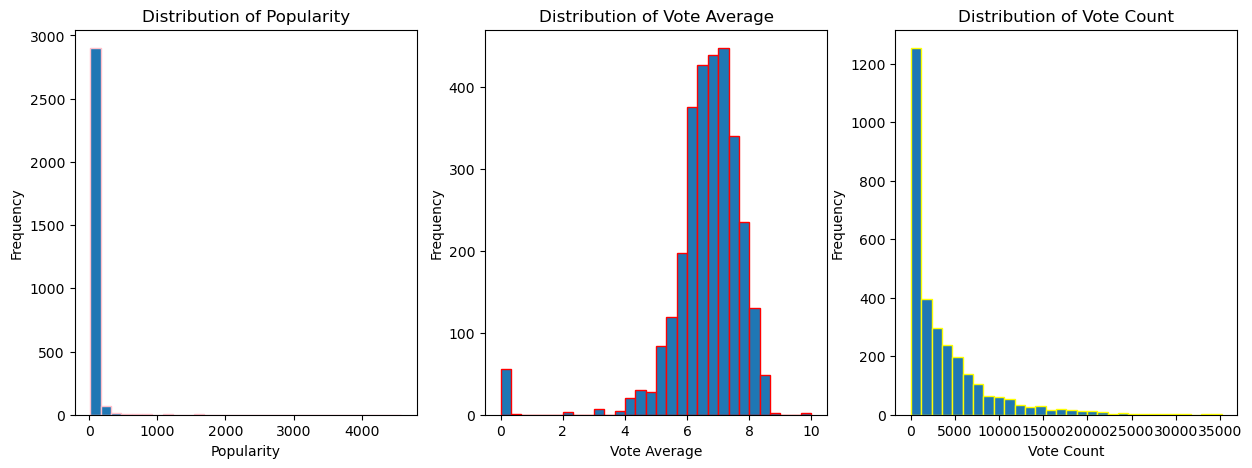

In [26]:
#check distribution to see if the distribution is already well-behaved 
#and within a reasonable range

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#histograms for 'popularity', 'vote_average', and 'vote_count'
axes[0].hist(tmdb_df['popularity'], bins=30, edgecolor='pink')
axes[0].set_title('Distribution of Popularity')
axes[0].set_xlabel('Popularity')
axes[0].set_ylabel('Frequency')

axes[1].hist(tmdb_df['vote_average'], bins=30, edgecolor='red')
axes[1].set_title('Distribution of Vote Average')
axes[1].set_xlabel('Vote Average')
axes[1].set_ylabel('Frequency')

axes[2].hist(tmdb_df['vote_count'], bins=30, edgecolor='yellow')
axes[2].set_title('Distribution of Vote Count')
axes[2].set_xlabel('Vote Count')
axes[2].set_ylabel('Frequency')

In [29]:
#Normalize numerical features for better model performance
scaler = MinMaxScaler()

tmdb_df['popularity_normalized'] = scaler.fit_transform(tmdb_df[['popularity']])


tmdb_df['vote_count_normalized'] = scaler.fit_transform(tmdb_df[['vote_count']])

**Interpretation**

Normalization was implemented because of the wide range and variability in popularity and vote count (minimum popularity is 18.09 and maximum is 4578.60 | the minimum vote count is 0, and the maximum is 35205 which indicates large range of values).

The distribution of popularity and vote count is right skewed, which in the case of popularity, it suggests that there are a few movies that are extremely popular. While in the case of vote_count, it suggests that there are a few movies with exceptionally high vote counts. The distribution of vote averages is left skewed, which indicates that there might be a concentration of movies with higher ratings 

**Genre**

In [32]:
#Explore the genres
genre_counts = tmdb_df['genre_ids'].explode().value_counts()
genre_counts

genre_ids
28       1108
18        974
35        831
53        823
12        795
14        542
878       501
16        494
10751     472
27        467
80        377
10749     374
9648      261
36        100
10752      88
10402      43
37         35
10770      34
99         25
Name: count, dtype: int64

In [35]:
#https://developer.themoviedb.org/reference/genre-movie-list
#map genre IDS to names 
genre_mapping = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}

In [36]:
#map genre IDS to name in the Dataframe
tmdb_df['genre_names'] = tmdb_df['genre_ids'].apply(lambda ids: [genre_mapping[id] for id in ids])

In [38]:
#after mapping
genre_counts2 = tmdb_df['genre_names'].explode().value_counts()
genre_counts2

genre_names
Action             1108
Drama               974
Comedy              831
Thriller            823
Adventure           795
Fantasy             542
Science Fiction     501
Animation           494
Family              472
Horror              467
Crime               377
Romance             374
Mystery             261
History             100
War                  88
Music                43
Western              35
TV Movie             34
Documentary          25
Name: count, dtype: int64

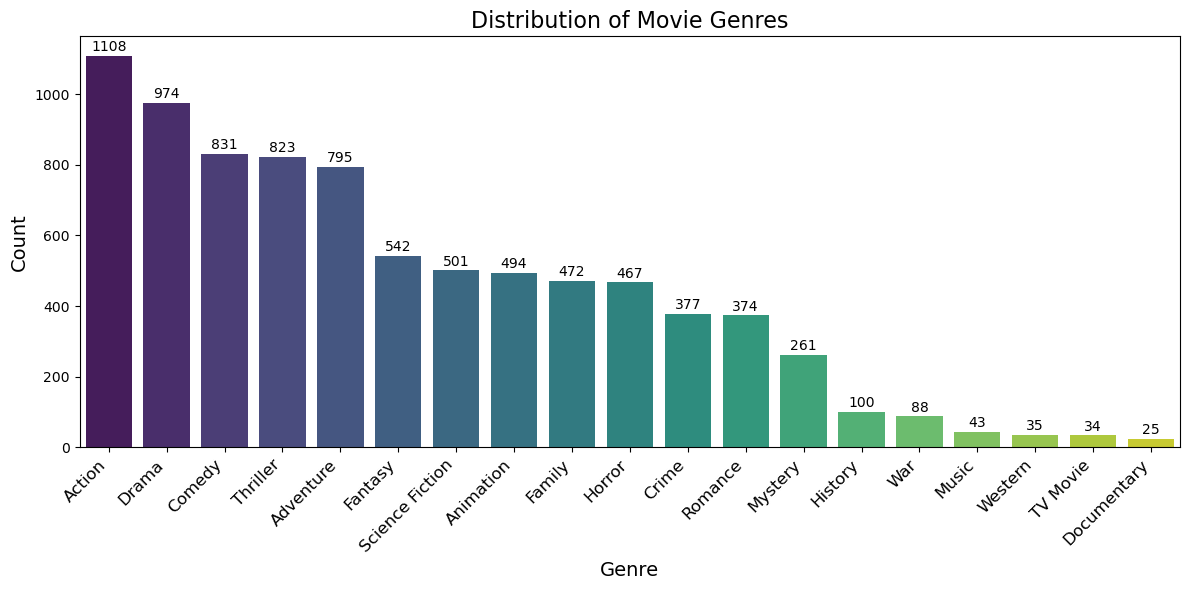

In [40]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=genre_counts2.index, y=genre_counts2.values, palette='viridis')
plt.title('Distribution of Movie Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(genre_counts2.values):
    bar_plot.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()


**Release Year**

In [41]:
#create new column that shows the release year
tmdb_df['release_year'] = pd.to_datetime(tmdb_df['release_date']).dt.year


,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,popularity_normalized,vote_count_normalized,genre_names,release_year
0,False,/4MCKNAc6AbWjEsM2h9Xc29owo4z.jpg,"[28, 53, 18]",866398,en,The Beekeeper,One man’s campaign for vengeance takes on nati...,4578.602,/A7EByudX0eOzlkQ2FIbogzyazm2.jpg,2024-01-10,The Beekeeper,False,7.422,733,1.000000,0.020821,"[Action, Thriller, Drama]",2024.0
1,False,/yyFc8Iclt2jxPmLztbP617xXllT.jpg,"[35, 10751, 14]",787699,en,Wonka,Willy Wonka – chock-full of ideas and determin...,1665.323,/qhb1qOilapbapxWQn9jtRCMwXJF.jpg,2023-12-06,Wonka,False,7.239,1886,0.361195,0.053572,"[Comedy, Family, Fantasy]",2023.0
2,False,/pWsD91G2R1Da3AKM3ymr3UoIfRb.jpg,"[28, 878, 18]",933131,ko,황야,After a deadly earthquake turns Seoul into a l...,1602.083,/zVMyvNowgbsBAL6O6esWfRpAcOb.jpg,2024-01-26,Badland Hunters,False,7.049,205,0.347328,0.005823,"[Action, Science Fiction, Drama]",2024.0
3,False,/cnqwv5Uz3UW5f086IWbQKr3ksJr.jpg,"[28, 12, 14]",572802,en,Aquaman and the Lost Kingdom,Black Manta seeks revenge on Aquaman for his f...,1373.572,/7lTnXOy0iNtBAdRP3TZvaKJ77F6.jpg,2023-12-20,Aquaman and the Lost Kingdom,False,6.985,1441,0.297222,0.040932,"[Action, Adventure, Fantasy]",2023.0
4,False,/feSiISwgEpVzR1v3zv2n2AU4ANJ.jpg,"[878, 12, 28]",609681,en,The Marvels,"Carol Danvers, aka Captain Marvel, has reclaim...",1220.928,/9GBhzXMFjgcZ3FdR9w3bUMMTps5.jpg,2023-11-08,The Marvels,False,6.357,1418,0.263751,0.040278,"[Science Fiction, Adventure, Action]",2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,/sSalNFInZxGi0bmmIKJoDz5jI6n.jpg,"[10749, 18]",710356,en,2 Hearts,When illness strikes two people who are polar ...,19.165,/a7bW3uKOMPBnmHs8gnlpfhTD8YQ.jpg,2020-10-16,2 Hearts,False,7.405,540,0.000236,0.015339,"[Romance, Drama]",2020.0
2996,False,/kSlO1pHpwQfPQdgVPr7dJiJNtJ8.jpg,"[35, 18]",3082,en,Modern Times,A bumbling tramp desires to build a home with ...,24.900,/uEMekS25hwXrCJOZZ3NKMGcAFJo.jpg,1936-02-05,Modern Times,False,8.296,3494,0.001493,0.099247,"[Comedy, Drama]",1936.0
2997,False,/ziRWOYnl6e2JUaHYmFLR1kfcECM.jpg,"[35, 878]",68,en,Brazil,Low-level bureaucrat Sam Lowry escapes the mon...,26.648,/d0PibPzCK4fVikjoD1PqHovbvkt.jpg,1985-02-20,Brazil,False,7.679,3103,0.001877,0.088141,"[Comedy, Science Fiction]",1985.0
2998,False,/yMAqgJyxLm7wqeuQOr3J6FlIHxf.jpg,"[12, 16, 9648]",17578,en,The Adventures of Tintin,"Intrepid young reporter, Tintin, and his loyal...",29.151,/mKYkNro2btaWMsnYSuyqrBdHQo3.jpg,2011-10-24,The Adventures of Tintin,False,6.895,5121,0.002426,0.145462,"[Adventure, Animation, Mystery]",2011.0


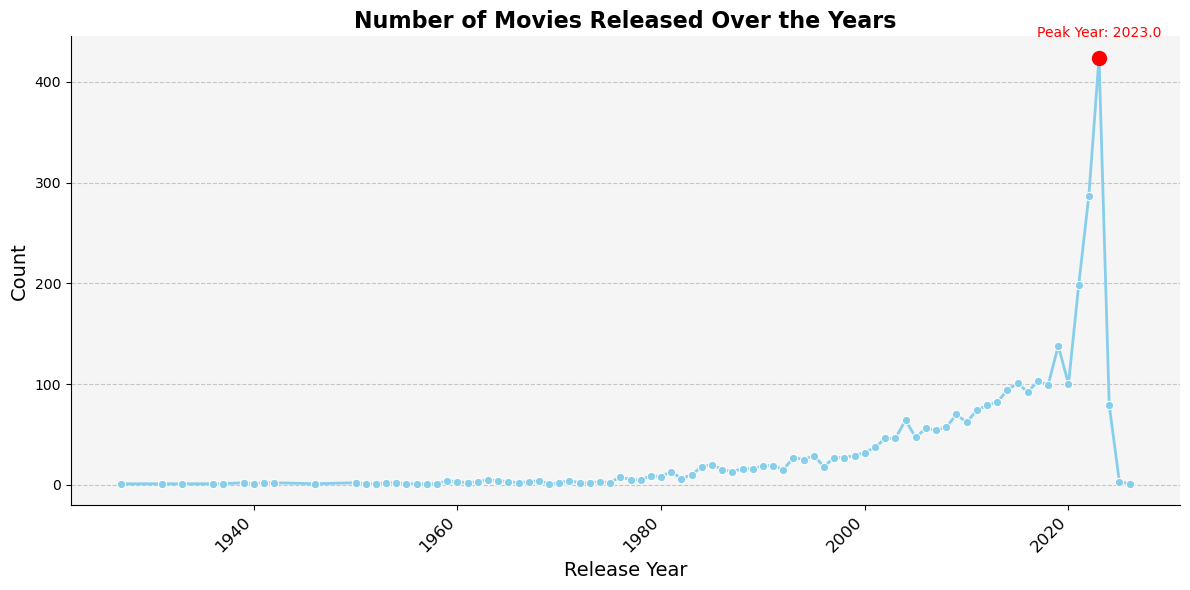

In [43]:
# Explore release years
release_year_counts = tmdb_df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(x=release_year_counts.index, y=release_year_counts.values,
                         marker='o', color='skyblue', linewidth=2)
#highlight the peak year with red mark
peak_year = release_year_counts.idxmax()
plt.scatter(peak_year, release_year_counts.max(), color='red', s=100, zorder=5)

#annotate the peak year
plt.text(peak_year, release_year_counts.max() + 20, f'Peak Year: {peak_year}', 
         color='red', ha='center', fontsize=10)
plt.title('Number of Movies Released Over the Years', fontsize=16, weight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

#background customization
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()

plt.show()


In [55]:
release_year_counts.sort_values(ascending=False)

release_year
2023.0    424
2022.0    287
2021.0    198
2019.0    138
2017.0    103
         ... 
1940.0      1
1937.0      1
1936.0      1
1933.0      1
2026.0      1
Name: count, Length: 87, dtype: int64